In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

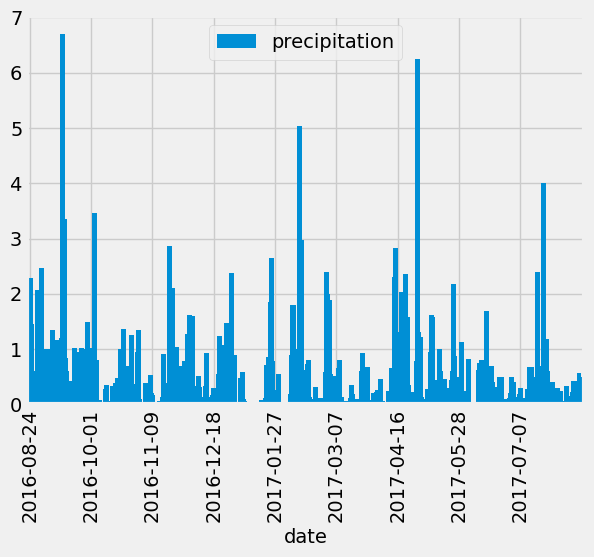

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date_minus_1 = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date > recent_date_minus_1)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_data_df = pd.DataFrame(year_data, columns=["date", "precipitation"])

# Sort the dataframe by date
year_data_df = year_data_df.sort_values(by='date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
year_data_df.plot(x="date", y="precipitation", kind="bar", width=20)
plt.locator_params(axis='x', nbins=9)


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_data_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
t_stations = session.query(station.station).count()
t_stations


9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
act_station_df = pd.DataFrame(session.query(measurement.station).all())
act_station_df["count"] = 1

act_station_df = act_station_df.groupby(act_station_df["station"]).count().sort_values(by="count", ascending=False)
act_station_df

,count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

t_low = session.query(func.min(measurement.tobs)).filter(measurement.station == act_station_df.first_valid_index()).first()
t_high = session.query(func.max(measurement.tobs)).filter(measurement.station == act_station_df.first_valid_index()).first()
t_av = session.query(func.avg(measurement.tobs)).filter(measurement.station == act_station_df.first_valid_index()).first()

metrics = [t_low, t_high, t_av]
metrics

[(54.0,), (85.0,), (71.66378066378067,)]

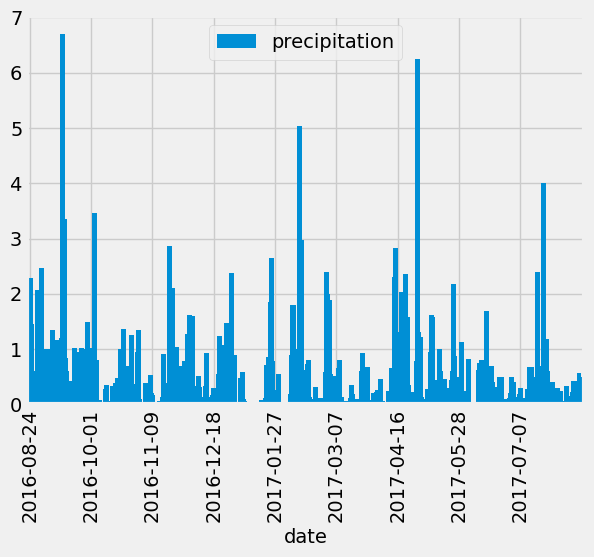

In [15]:
# Calculate the date one year from the last date in data set.
recent_date_minus_1 = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date > recent_date_minus_1)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_data_df = pd.DataFrame(year_data, columns=["date", "precipitation"])

# Sort the dataframe by date
year_data_df = year_data_df.sort_values(by='date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.pyplot as plt

year_data_df.plot(x="date", y="precipitation", kind="bar", width=20)
plt.locator_params(axis='x', nbins=9)

array([[<Axes: title={'center': 'Temperature'}>]], dtype=object)

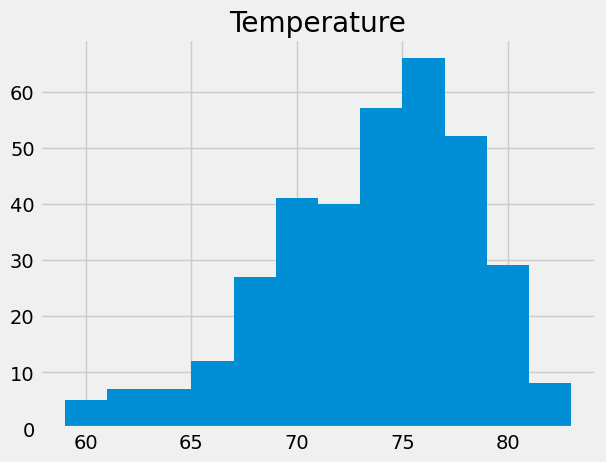

In [16]:
active_temp = session.query(measurement.tobs, measurement.date).filter(measurement.station == act_station_df.first_valid_index())
twelve_mo_temp = active_temp.filter(measurement.date > recent_date_minus_1)
twelve_mo_temp_df = pd.DataFrame((twelve_mo_temp))
twelve_mo_temp_df = twelve_mo_temp_df.drop(columns=["date"])
twelve_mo_temp_df.columns = ['Temperature']

twelve_mo_temp_df.hist(column='Temperature', bins=12)


# Close Session

In [17]:
# Close Session
session.close()